In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

```markdown
# Diabetes Patient Readmission Prediction

## Project Overview
This project aims to predict the readmission of diabetes patients using a dataset containing various patient and encounter information. The goal is to develop a machine learning model, specifically a Multi-Layer Perceptron (MLP) using PyTorch, to classify whether a patient will be readmitted within 30 days (`<30`), after 30 days (`>30`), or not at all (`NO`).

## Dataset
The dataset used is `diabetic_data.csv`, which contains 50 features and 101,766 entries. It includes demographic information, hospital visit details, medical specialties, lab procedures, medications, diagnoses, and readmission status.

### Key Features:
*   `encounter_id`, `patient_nbr`
*   `race`, `gender`, `age`
*   `admission_type_id`, `discharge_disposition_id`, `admission_source_id`
*   `time_in_hospital`
*   `payer_code`, `medical_specialty`
*   `num_lab_procedures`, `num_procedures`, `num_medications`
*   `number_outpatient`, `number_emergency`, `number_inpatient`
*   `diag_1`, `diag_2`, `diag_3`, `number_diagnoses`
*   `max_glu_serum`, `A1Cresult`
*   Various medication features (e.g., `metformin`, `insulin`, `glipizide`)
*   `change`, `diabetesMed`, `readmitted` (target variable)

## Data Preprocessing
The following steps were performed to prepare the data for modeling:

1.  **Age Group Mapping**: The `age` column, originally in range format (e.g., `[0-10)`), was mapped to a more interpretable string format (e.g., `0-9`).
2.  **Handling Missing Values**:
    *   `'?'` values across the dataset were replaced with `np.nan`.
    *   Missing values in `max_glu_serum` and `A1Cresult` were filled with `'None'`.
    *   `'Unknown'` and `'Unknown/Invalid'` values in the `gender` column were replaced with `np.nan`.
    *   Rows with any remaining `np.nan` values were dropped from the selected features.
3.  **Feature Selection**: A subset of features was selected for the model:
    `['age', 'gender', 'time_in_hospital', 'number_inpatient', 'number_emergency', 'number_outpatient', 'num_medications', 'num_lab_procedures', 'number_diagnoses', 'A1Cresult', 'max_glu_serum', 'insulin', 'diabetesMed', 'change', 'readmitted']`
4.  **Categorical Feature Encoding**: Categorical features (`age`, `gender`, `A1Cresult`, `max_glu_serum`, `insulin`, `diabetesMed`, `change`) were one-hot encoded using `OneHotEncoder`.
5.  **Numerical Feature Scaling**: Numerical features were scaled using `StandardScaler`.
6.  **Target Variable Encoding**: The `readmitted` target variable was label encoded into numerical classes (0, 1, 2).

## Exploratory Data Analysis (EDA)
EDA was conducted to understand the distribution of variables and their relationship with the target variable, `readmitted`.

*   **Distribution of `readmitted`**: Analyzed the counts of `NO`, `>30`, and `<30` readmissions.
*   **Categorical Feature Analysis**: Count plots were generated to visualize the distribution of `insulin`, `diabetesMed`, `age`, `gender`, `max_glu_serum`, and `change` against `readmitted`.
*   **Numerical Feature Analysis**: Bar plots were created to show the frequency of readmissions (`<30`) across different values for `time_in_hospital`, `number_emergency`, `number_inpatient`, `number_outpatient`, `number_diagnoses`, `num_medications`, and `num_lab_procedures`.
*   **Correlation Analysis**: A heatmap was used to visualize the correlation between numerical features.

## Model Training

The data was split into training (80%), validation (10%), and test (10%) sets using `train_test_split` with stratification to maintain class distribution. Several MLP models were implemented and trained using PyTorch:

1.  **Base MLP**: A simple MLP with one hidden layer and ReLU activation.
2.  **MLP with Batch Normalization (DiabetesBN_MLP)**: Added `BatchNorm1d` layer after the first linear layer to improve training stability and performance.
3.  **MLP with Dropout and L2 Regularization (Diabetes_MLP_Drop_L2)**: Incorporated `Dropout` for regularization and `weight_decay` in the optimizer for L2 regularization.
4.  **MLP with Class Weights (Diabetes_MLP_CW)**: Used `CrossEntropyLoss` with class weights calculated from the training data to address class imbalance.
5.  **Multi-layer MLP with BCEWithLogitsLoss (DiabetesMLP)**: A deeper MLP with two hidden layers and `BCEWithLogitsLoss` using `pos_weight` for binary classification. *(Note: This model was trained for a binary classification task, which might not align with the 3-class target variable. The `pos_weight` calculation in the notebook assumes binary classification.)*

All models were trained for 1000 epochs, and training/validation loss was monitored.

## Model Evaluation

Models were evaluated on the test set using Accuracy and Macro F1-score. For the best-performing model (Diabetes_MLP_CW), a detailed classification report and a confusion matrix were generated.

### Evaluation Metrics:
*   **Accuracy Score**: The proportion of correctly classified instances.
*   **Macro F1 Score**: The unweighted mean of the F1 score for each class, useful for imbalanced datasets.

### Model Performance Comparison:
| Model    | Test Accuracy | Macro F1 Score |
| :------- | :------------ | :------------- |
| Base     | 0.568832      | 0.379697       |
| Drop_out | 0.569913      | 0.361146       |
| CW       | 0.480692      | 0.416107       |
| CW_new   | 0.345485      | 0.261711       |

### Classification Report for Diabetes_MLP_CW:
```
              precision    recall  f1-score   support

           0       0.19      0.43      0.26      1136
           1       0.43      0.30      0.36      3555
           2       0.66      0.61      0.63      5486

    accuracy                           0.48     10177
   macro avg       0.43      0.45      0.42     10177
weighted avg       0.53      0.48      0.49     10177
```

## Results and Discussion

The `Diabetes_MLP_CW` model, which uses class weighting to handle imbalance, showed the best Macro F1-score despite having a lower overall accuracy compared to the `Base` and `Drop_out` models. This suggests that while overall accuracy might be lower, it is doing a better job at identifying the minority classes, which is often crucial in medical prediction tasks. The individual class metrics in the classification report highlight the challenge in predicting the minority classes (0 and 1, representing readmission `<30` and `>30` respectively) compared to the majority class (2, representing `NO` readmission).

Further efforts could focus on advanced techniques for imbalanced datasets, more complex model architectures, or hyperparameter tuning to improve overall performance, especially for the `<30` readmission class.
```

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/diabetic_data.csv")
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [ ]:
age_dict={
    "[0-10)":"0-9",
    "[10-20)": "10-19",
    "[20-30)": "20-29",
    "[30-40)": "30-39",
    "[40-50)" : "40-49",
    "[50-60)": "50-59",
    "[60-70)": "60-69",
    "[70-80)": "70-79",
    "[80-90)": "80-89",
    "[90-100)": "90-100"
}

df["age"] = df["age"].replace(age_dict)

In [ ]:
df = df.replace("?", np.nan)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
weight,98569
max_glu_serum,96420
A1Cresult,84748
medical_specialty,49949
payer_code,40256
race,2273
diag_3,1423
diag_2,358
diag_1,21
patient_nbr,0


In [ ]:
df["max_glu_serum"] = df["max_glu_serum"].fillna("None")

In [ ]:
df["A1Cresult"] = df["A1Cresult"].fillna("None")

In [ ]:
selected_features = [
    "age",
    "gender",
    "time_in_hospital",
    "number_inpatient",
    "number_emergency",
    "number_outpatient",
    "num_medications",
    "num_lab_procedures",
    "number_diagnoses",
    "A1Cresult",
    "max_glu_serum",
    "insulin",
    "diabetesMed",
    "change",
    "readmitted"
]

In [ ]:
df_new = df[selected_features]
df_new.head()

,age,gender,time_in_hospital,number_inpatient,number_emergency,number_outpatient,num_medications,num_lab_procedures,number_diagnoses,A1Cresult,max_glu_serum,insulin,diabetesMed,change,readmitted
0,0-9,Female,1,0,0,0,1,41,1,None,None,No,No,No,NO
1,10-19,Female,3,0,0,0,18,59,9,None,None,Up,Yes,Ch,>30
2,20-29,Female,2,1,0,2,13,11,6,None,None,No,Yes,No,NO
3,30-39,Male,2,0,0,0,16,44,7,None,None,Up,Yes,Ch,NO
4,40-49,Male,1,0,0,0,8,51,5,None,None,Steady,Yes,Ch,NO


In [ ]:
df_new = df_new.replace("Unknown", np.nan)
df_new = df_new.replace("Unknown/Invalid", np.nan)

In [ ]:
df_new.isnull().sum()

,0
age,0
gender,3
time_in_hospital,0
number_inpatient,0
number_emergency,0
number_outpatient,0
num_medications,0
num_lab_procedures,0
number_diagnoses,0
A1Cresult,0


In [ ]:
df_new.dropna(inplace=True)

In [ ]:
df_new.isna().sum()

,0
age,0
gender,0
time_in_hospital,0
number_inpatient,0
number_emergency,0
number_outpatient,0
num_medications,0
num_lab_procedures,0
number_diagnoses,0
A1Cresult,0


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101763 entries, 0 to 101765
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 101763 non-null  object
 1   gender              101763 non-null  object
 2   time_in_hospital    101763 non-null  int64 
 3   number_inpatient    101763 non-null  int64 
 4   number_emergency    101763 non-null  int64 
 5   number_outpatient   101763 non-null  int64 
 6   num_medications     101763 non-null  int64 
 7   num_lab_procedures  101763 non-null  int64 
 8   number_diagnoses    101763 non-null  int64 
 9   A1Cresult           101763 non-null  object
 10  max_glu_serum       101763 non-null  object
 11  insulin             101763 non-null  object
 12  diabetesMed         101763 non-null  object
 13  change              101763 non-null  object
 14  readmitted          101763 non-null  object
dtypes: int64(7), object(8)
memory usage: 12.4+ MB


In [ ]:
#df_new["new_readmitted"] = df_new["readmitted"].apply(lambda x: 1 if x == "<30" else 0)

In [ ]:
#df_new = df_new.drop(columns="readmitted")

In [ ]:
df_new.head()

,age,gender,time_in_hospital,number_inpatient,number_emergency,number_outpatient,num_medications,num_lab_procedures,number_diagnoses,A1Cresult,max_glu_serum,insulin,diabetesMed,change,readmitted
0,0-9,Female,1,0,0,0,1,41,1,None,None,No,No,No,NO
1,10-19,Female,3,0,0,0,18,59,9,None,None,Up,Yes,Ch,>30
2,20-29,Female,2,1,0,2,13,11,6,None,None,No,Yes,No,NO
3,30-39,Male,2,0,0,0,16,44,7,None,None,Up,Yes,Ch,NO
4,40-49,Male,1,0,0,0,8,51,5,None,None,Steady,Yes,Ch,NO


In [ ]:
df_new["readmitted"].value_counts()

,count
readmitted,
NO,54861
>30,35545
<30,11357


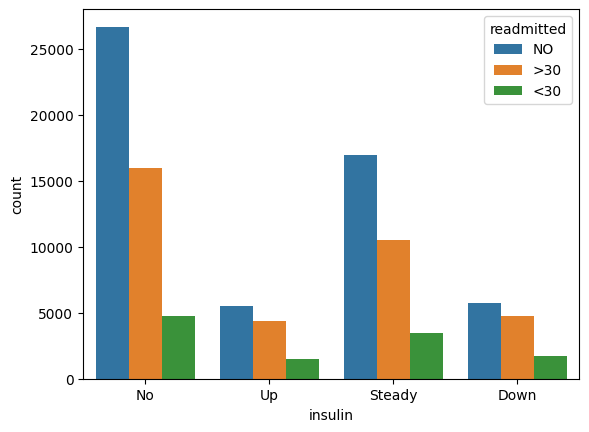

In [ ]:
df_new["insulin"].value_counts()

sns.countplot(data=df_new, x="insulin", hue="readmitted")
plt.show()

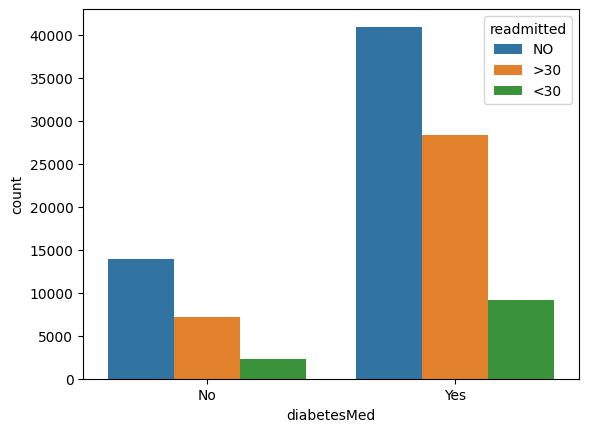

In [ ]:
df_new["diabetesMed"].value_counts(normalize=True)

sns.countplot(data=df_new, x="diabetesMed", hue="readmitted")
plt.show()

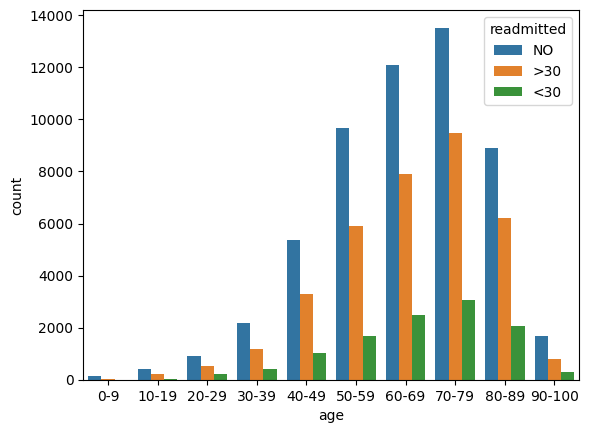

In [ ]:
df_new["age"].value_counts(normalize=True)

sns.countplot(data=df_new, x="age", hue="readmitted" )
plt.show()

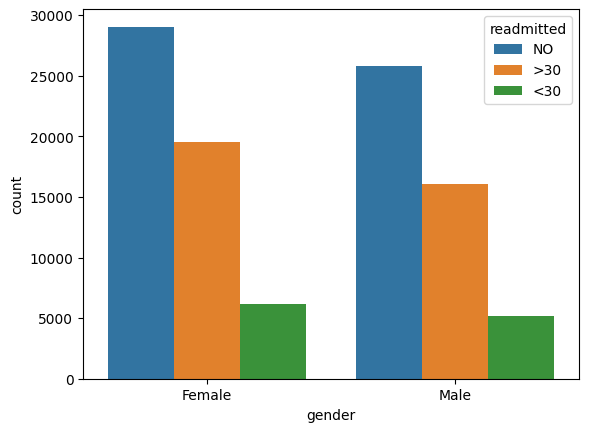

In [ ]:
df_new["gender"].value_counts()

sns.countplot(data=df_new, x="gender", hue="readmitted" )
plt.show()

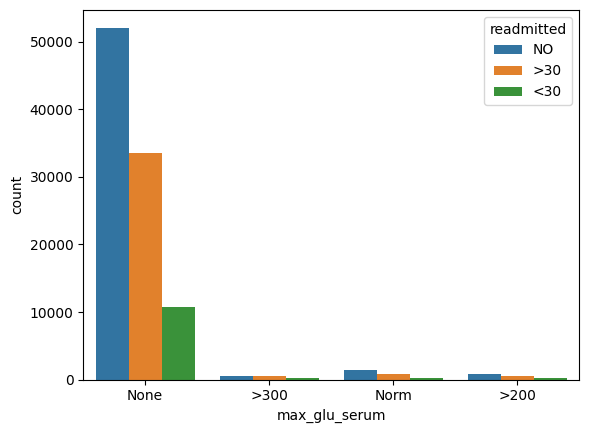

In [ ]:
df_new["max_glu_serum"].value_counts()

sns.countplot(data=df_new, x="max_glu_serum", hue="readmitted" )
plt.show()

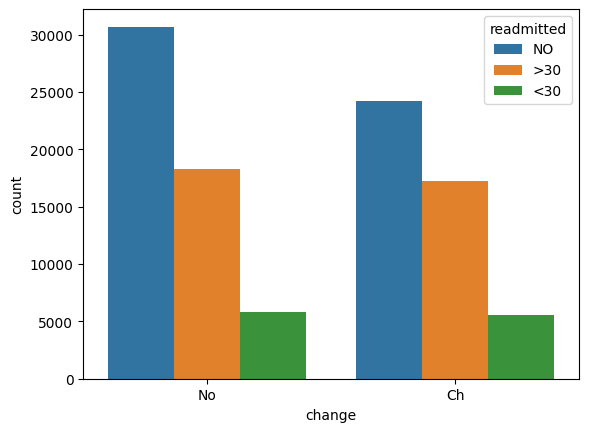

In [ ]:
df_new["change"].value_counts()

sns.countplot(data=df_new, x="change", hue="readmitted" )
plt.show()

<Axes: xlabel='time_in_hospital', ylabel='frequency'>

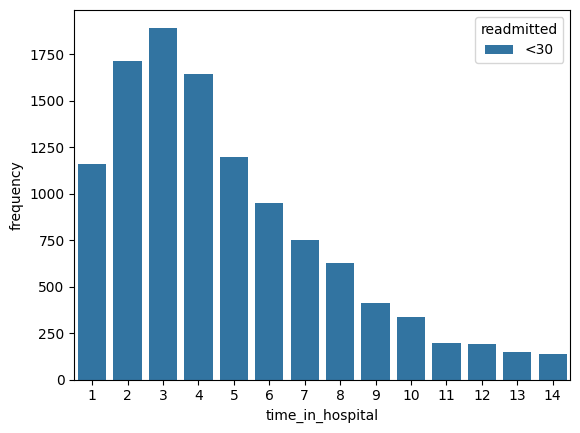

In [ ]:
hosp_time = df_new["time_in_hospital"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_hosp_time = hosp_time[hosp_time["readmitted"]=="<30"]

sns.barplot(data=new_hosp_time, x="time_in_hospital", y="frequency", hue="readmitted")

<Axes: xlabel='number_emergency', ylabel='frequency'>

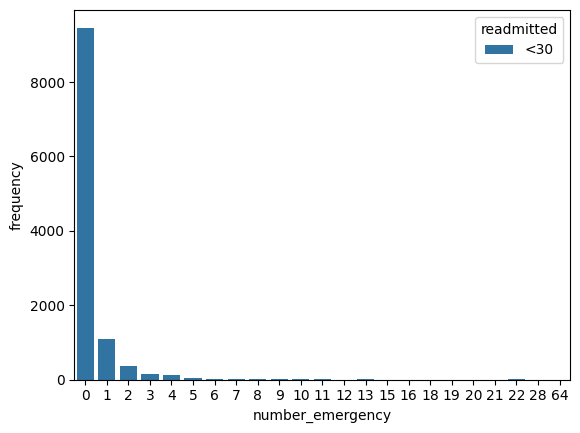

In [ ]:
emerg = df_new["number_emergency"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_emerg = emerg[emerg["readmitted"]=="<30"]

sns.barplot(data=new_emerg, x="number_emergency", y="frequency", hue="readmitted")

<Axes: xlabel='number_inpatient', ylabel='frequency'>

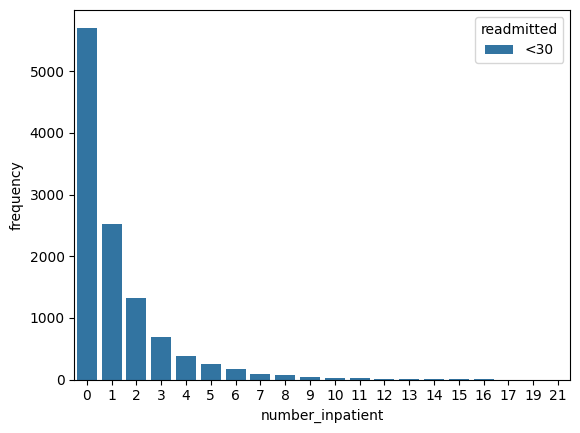

In [ ]:
in_pat = df_new["number_inpatient"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_in_pat = in_pat[in_pat["readmitted"]=="<30"]

sns.barplot(data=new_in_pat, x="number_inpatient", y="frequency", hue="readmitted")

<Axes: xlabel='number_outpatient', ylabel='frequency'>

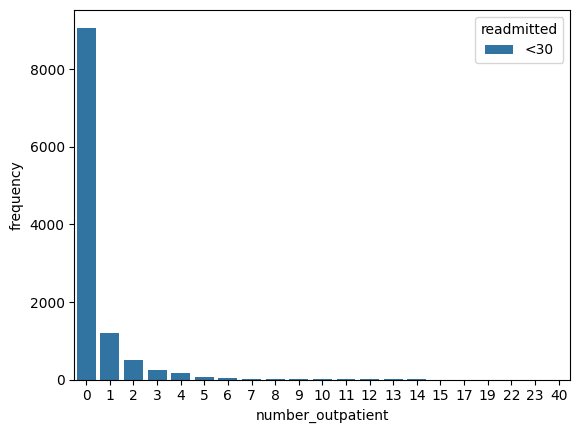

In [ ]:
out_pat = df_new["number_outpatient"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_out_pat = out_pat[out_pat["readmitted"]=="<30"]

sns.barplot(data=new_out_pat, x="number_outpatient", y="frequency", hue="readmitted")

<Axes: xlabel='number_diagnoses', ylabel='frequency'>

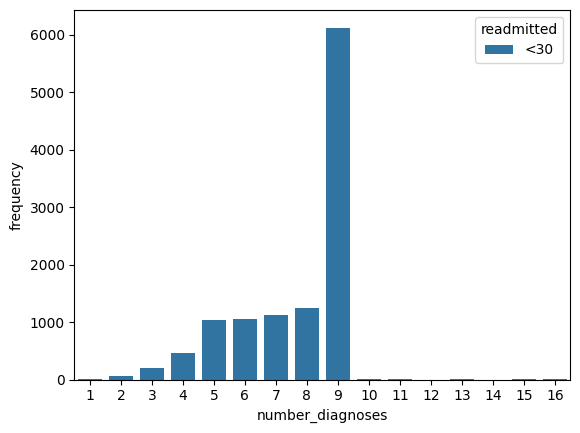

In [ ]:
diag = df_new["number_diagnoses"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_diag = diag[diag["readmitted"]=="<30"]

sns.barplot(data=new_diag, x="number_diagnoses", y="frequency", hue="readmitted")

<Axes: xlabel='num_medications', ylabel='frequency'>

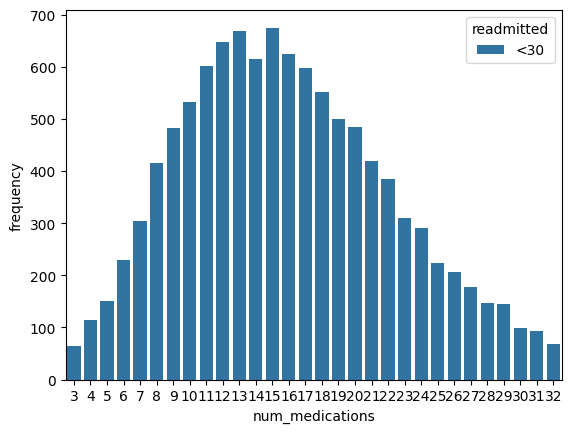

In [ ]:
med = df_new["num_medications"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_med = med[med["readmitted"]=="<30"].sort_values(by="frequency", ascending=False).head(30)

sns.barplot(data=new_med, x="num_medications", y="frequency", hue="readmitted")

<Axes: xlabel='num_lab_procedures', ylabel='frequency'>

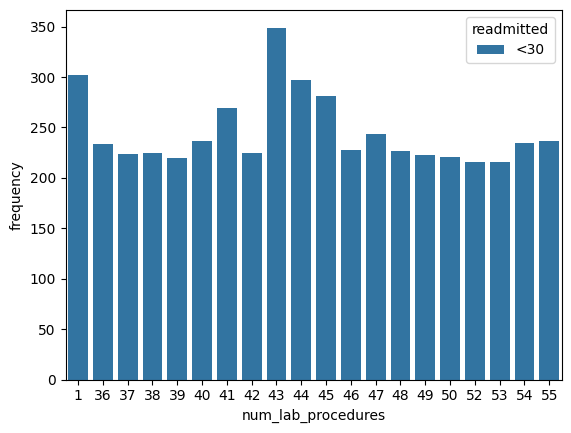

In [ ]:
lab = df_new["num_lab_procedures"].groupby(df_new["readmitted"]).value_counts().rename("frequency").to_frame().reset_index()
new_lab = lab[lab["readmitted"]=="<30"].sort_values(by="frequency", ascending=False).head(20)

sns.barplot(data=new_lab, x="num_lab_procedures", y="frequency", hue="readmitted")

<Axes: >

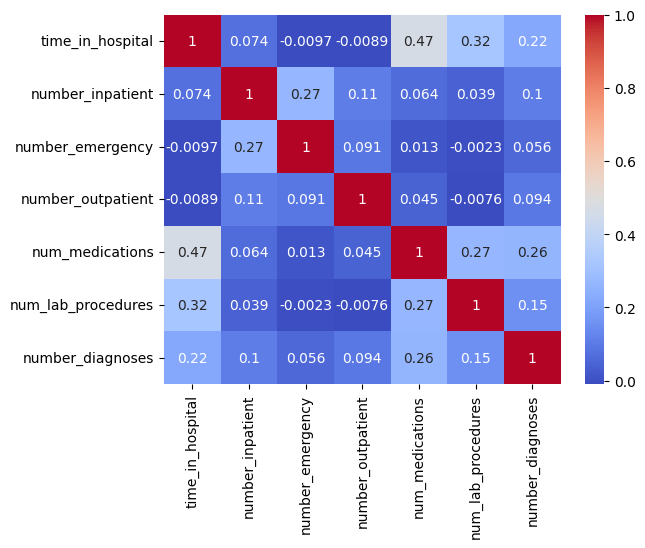

In [ ]:
corr = df_new.select_dtypes("number").corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_selection import SelectKBest, f_classif
from  sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
X = df_new.drop(columns='readmitted')
y= df_new["readmitted"].values.reshape(-1,1)

In [ ]:
X_cat = X.select_dtypes("object").columns.tolist()
X_num = X.select_dtypes("number").columns.tolist()

In [ ]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown="ignore")

In [ ]:
X_scaled = scaler.fit_transform(X[X_num])
X_encoded = encoder.fit_transform(X[X_cat])

In [ ]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X_num)

In [ ]:
X_cat_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out())

In [ ]:
X_df = pd.concat([X_scaled_df, X_cat_df], axis=1)

In [ ]:
X_df.head()

,time_in_hospital,number_inpatient,number_emergency,number_outpatient,num_medications,num_lab_procedures,number_diagnoses,age_0-9,age_10-19,age_20-29,...,max_glu_serum_None,max_glu_serum_Norm,insulin_Down,insulin_No,insulin_Steady,insulin_Up,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No
0,-1.137665,-0.503285,-0.212623,-0.291466,-1.848261,-0.106531,-3.321656,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.467666,-0.503285,-0.212623,-0.291466,0.243390,0.808376,0.815772,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-0.802665,0.288561,-0.212623,1.286722,-0.371802,-1.631377,-0.735763,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,-0.802665,-0.503285,-0.212623,-0.291466,-0.002687,0.045953,-0.218585,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-1.137665,-0.503285,-0.212623,-0.291466,-0.986993,0.401751,-1.252942,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   time_in_hospital    101763 non-null  float64
 1   number_inpatient    101763 non-null  float64
 2   number_emergency    101763 non-null  float64
 3   number_outpatient   101763 non-null  float64
 4   num_medications     101763 non-null  float64
 5   num_lab_procedures  101763 non-null  float64
 6   number_diagnoses    101763 non-null  float64
 7   age_0-9             101763 non-null  float64
 8   age_10-19           101763 non-null  float64
 9   age_20-29           101763 non-null  float64
 10  age_30-39           101763 non-null  float64
 11  age_40-49           101763 non-null  float64
 12  age_50-59           101763 non-null  float64
 13  age_60-69           101763 non-null  float64
 14  age_70-79           101763 non-null  float64
 15  age_80-89           101763 non-nul

In [ ]:
y_encoded = LabelEncoder().fit_transform(y.ravel())

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_df.values, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
X_train_tensor.shape, y_train_tensor.shape

(torch.Size([81410, 35]), torch.Size([81410]))

In [ ]:
X_val_tensor.shape, y_val_tensor.shape

(torch.Size([10176, 35]), torch.Size([10176]))

In [ ]:
X_test_tensor.shape, y_test_tensor.shape

(torch.Size([10177, 35]), torch.Size([10177]))

In [ ]:
import torch.nn.functional as F
class DiabetesBase_MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(DiabetesBase_MLP, self).__init__()
    self.net=nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size),
    )

  def forward(self, x):
    return self.net(x)

torch.manual_seed(42)
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 3
model = DiabetesBase_MLP(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
train_loss =[]
val_loss = []

for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  output = model(X_train_tensor)
  loss = criterion(output, y_train_tensor)

  loss.backward()
  optimizer.step()
  train_loss.append(loss.item())

  model.eval()
  with torch.no_grad():
    val_output = model(X_val_tensor)
    current_val_loss = criterion(val_output, y_val_tensor)
    val_loss.append(current_val_loss.item())

  if (epoch+1) % 200 == 0:
    print(f"{epoch+1} Train Loss: {loss.item():.4f} and Val Loss: {current_val_loss.item():.4f}")

200 Train Loss: 0.8850 and Val Loss: 0.8999
400 Train Loss: 0.8794 and Val Loss: 0.9043
600 Train Loss: 0.8779 and Val Loss: 0.9071
800 Train Loss: 0.8761 and Val Loss: 0.9091
1000 Train Loss: 0.8753 and Val Loss: 0.9103


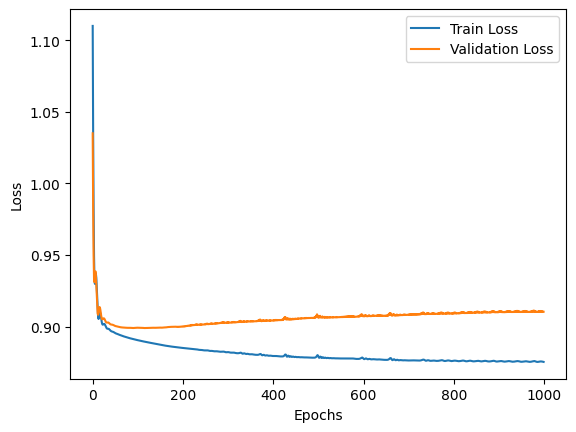

In [ ]:
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
class DiabetesBN_MLP(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(DiabetesBN_MLP, self).__init__()
    self.net=nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, output_size),
    )

  def forward(self, x):
    return self.net(x)

torch.manual_seed(42)
input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 3
model_bn = DiabetesBN_MLP(input_size, hidden_size, output_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000
train_loss_bn =[]
val_loss_bn = []

for epoch in range(epochs):
  model_bn.train()
  output = model_bn(X_train_tensor)
  loss = criterion(output, y_train_tensor)

  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  train_loss_bn.append(loss.item())

  model_bn.eval()
  with torch.no_grad():
    val_output = model_bn(X_val_tensor)
    current_val_loss = criterion(val_output, y_val_tensor)
    val_loss_bn.append(current_val_loss.item())

  if (epoch+1) % 200 == 0:
    print(f"{epoch+1} Train Loss: {loss.item():.4f} and Val Loss: {current_val_loss.item():.4f}")

200 Train Loss: 1.1778 and Val Loss: 1.1783
400 Train Loss: 1.1778 and Val Loss: 1.1783
600 Train Loss: 1.1778 and Val Loss: 1.1783
800 Train Loss: 1.1778 and Val Loss: 1.1783
1000 Train Loss: 1.1778 and Val Loss: 1.1783


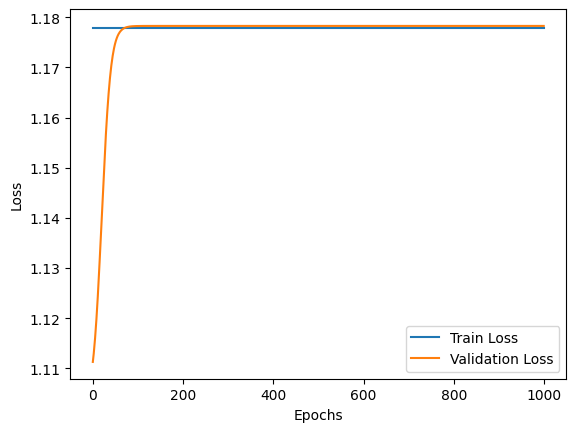

In [ ]:
plt.plot(train_loss_bn, label="Train Loss")
plt.plot(val_loss_bn, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
class Diabetes_MLP_Drop_L2(nn.Module):
  def __init__(self, input_size, hidden_size, output_size, drop_out):
    super(Diabetes_MLP_Drop_L2, self).__init__()
    self.net=nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(),
        nn.Dropout(drop_out),
        nn.Linear(hidden_size, output_size),
    )

  def forward(self, x):
    return self.net(x)

input_size = X_train_tensor.shape[1]
hidden_size = 64
output_size = 3
drop_out = 0.5
model_drop = Diabetes_MLP_Drop_L2(input_size, hidden_size, output_size, drop_out)

torch.manual_seed(42)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_drop.parameters(), lr=0.01, weight_decay=1e-4)

epochs = 1000
train_loss_d =[]
val_loss_d = []

for epoch in range(epochs):
  model_drop.train()
  optimizer.zero_grad()
  output = model_drop(X_train_tensor)
  loss_d = criterion(output,y_train_tensor)

  loss_d.backward()
  optimizer.step()
  train_loss_d.append(loss_d.item())

  model.eval()
  with torch.no_grad():
    val_output = model_drop(X_val_tensor)
    current_val_loss_d = criterion(val_output,y_val_tensor)
    val_loss_d.append(current_val_loss_d.item())

  if (epoch+1) % 200 == 0:
    print(f"{epoch+1} Train Loss: {loss_d.item():.4f} and Val Loss: {current_val_loss_d.item():.4f}")

200 Train Loss: 0.8991 and Val Loss: 0.9070
400 Train Loss: 0.8970 and Val Loss: 0.9039
600 Train Loss: 0.8974 and Val Loss: 0.9038
800 Train Loss: 0.8964 and Val Loss: 0.9048
1000 Train Loss: 0.8962 and Val Loss: 0.9045


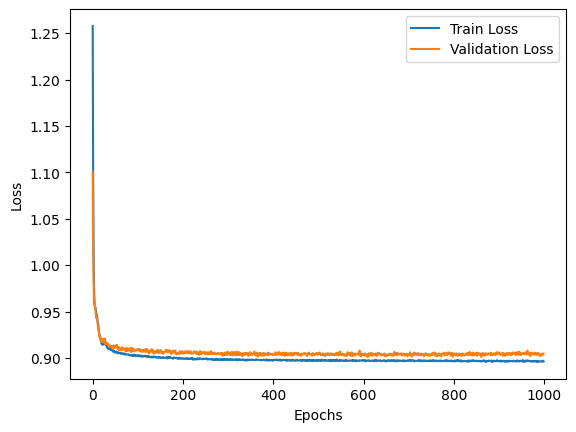

In [ ]:
plt.plot(train_loss_d, label="Train Loss")
plt.plot(val_loss_d, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
class Diabetes_MLP_CW(nn.Module):
  def __init__(self, input_size, hidden_size,output_size, drop_out):
    super(Diabetes_MLP_CW, self).__init__()
    self.net=nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.BatchNorm1d(hidden_size),
        nn.ReLU(),
        nn.Dropout(drop_out),
        nn.Linear(hidden_size,output_size)
    )

  def forward(self, x):
    return self.net(x)

torch.manual_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train_tensor.shape[1]
hidden_size = 64
drop_out = 0.5
output_size = 3
model_c = Diabetes_MLP_CW(input_size, hidden_size,output_size, drop_out).to(device)

from collections import Counter

# y_train_tensor shape: [N, 1]. Squeeze to [N] for Counter.
class_counts = Counter(y_train_tensor.squeeze().tolist())
num_classes = len(class_counts)
total_samples = sum(class_counts.values())

class_weights = [
    total_samples / (num_classes * class_counts[i])
    for i in range(num_classes)
]

class_weights = torch.tensor(class_weights, dtype=torch.float)
print("Class weights:", class_weights)

criterion =  nn.CrossEntropyLoss(weight=class_weights.to(device))
# Use model_c parameters, not model_drop's parameters
optimizer = optim.Adam(model_c.parameters(), lr=0.001, weight_decay=1e-4)

epochs = 1000
train_loss_c =[]
val_loss_c = []

for epoch in range(epochs):
  model_c.train() # Use model_c
  optimizer.zero_grad()
  output = model_c(X_train_tensor.to(device))
  # Target for CrossEntropyLoss should be a 1D tensor of class indices (type long)
  loss_c = criterion(output, y_train_tensor.squeeze().to(device))

  loss_c.backward()
  optimizer.step()
  train_loss_c.append(loss_c.item())

  model_c.eval() # Use model_c
  with torch.no_grad():
    val_output = model_c(X_val_tensor.to(device))
    # Target for CrossEntropyLoss should be a 1D tensor of class indices (type long)
    current_val_loss_c = criterion(val_output, y_val_tensor.squeeze().to(device))
    val_loss_c.append(current_val_loss_c.item())

  if (epoch+1) % 200 == 0:
    print(f"{epoch+1} Train Loss: {loss_c.item():.4f} and Val Loss: {current_val_loss_c.item():.4f}")

Class weights: tensor([2.9870, 0.9543, 0.6183])
200 Train Loss: 1.0531 and Val Loss: 1.0541
400 Train Loss: 1.0508 and Val Loss: 1.0529
600 Train Loss: 1.0491 and Val Loss: 1.0524
800 Train Loss: 1.0479 and Val Loss: 1.0521
1000 Train Loss: 1.0473 and Val Loss: 1.0518


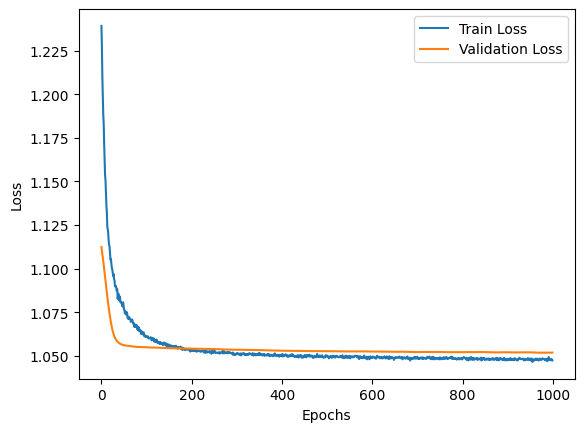

In [ ]:
plt.plot(train_loss_c, label="Train Loss")
plt.plot(val_loss_c, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
class DiabetesMLP(nn.Module):
    def __init__(self, input_size, hidden_size, drop_out):
        super(DiabetesMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.BatchNorm1d(hidden_size),
            nn.ReLU(),
            nn.Dropout(drop_out),

            nn.Linear(hidden_size, hidden_size // 2),
            nn.BatchNorm1d(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(drop_out),

            nn.Linear(hidden_size // 2, 1)
        )

    def forward(self, x):
        return self.net(x)

pos = (y_train_tensor == 1).sum()
neg = (y_train_tensor == 0).sum()

pos_weight = neg / pos
pos_weight = torch.tensor(pos_weight, dtype=torch.float).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

Model = DiabetesMLP(
    input_size=X_train_tensor.shape[1],
    hidden_size=X_train_tensor.shape[1] * 2,
    drop_out=0.3
).to(device)

optimizer = optim.AdamW(
    Model.parameters(),
    lr=1e-3,
    weight_decay=1e-4
)

train_loss_n = []
val_loss_n = []
epochs = 1000
for epoch in range(epochs):
    Model.train()
    optimizer.zero_grad()

    logits = Model(X_train_tensor.to(device))
    loss = criterion(
        logits,
        y_train_tensor.float().to(device) # Removed .unsqueeze(1)
    )

    loss.backward()
    optimizer.step()
    train_loss_n.append(loss.item())

    Model.eval()
    with torch.no_grad():
        val_logits = Model(X_val_tensor.to(device))
        val_loss = criterion(
            val_logits,
            y_val_tensor.float().to(device) # Removed .unsqueeze(1)
        )
        val_loss_n.append(val_loss.item())

    if (epoch + 1) % 200 == 0:
        print(f"{epoch+1} | Train: {loss.item():.4f} | Val: {val_loss.item():.4f}")

/tmp/ipython-input-4232510590.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  pos_weight = torch.tensor(pos_weight, dtype=torch.float).to(device)


200 | Train: 1.1687 | Val: 1.1756
400 | Train: 1.1589 | Val: 1.1761
600 | Train: 1.1540 | Val: 1.1785
800 | Train: 1.1492 | Val: 1.1801
1000 | Train: 1.1401 | Val: 1.1817


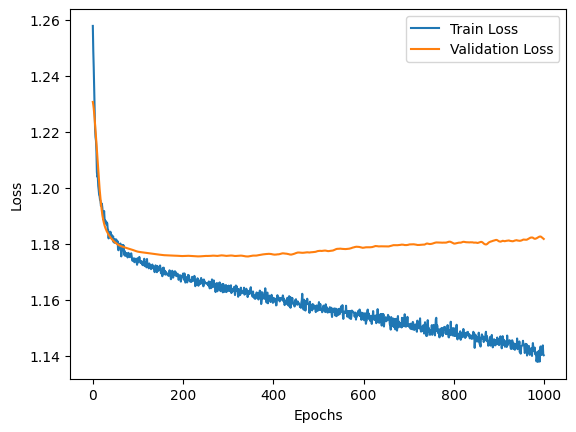

In [ ]:
plt.plot(train_loss_n, label="Train Loss")
plt.plot(val_loss_n, label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
def evaluate_model(model, X_test_tesnsor, y_test_tesnsor):
    model.eval()
    with torch.no_grad():
        logits = model(X_test_tesnsor)
        preds = torch.argmax(logits, dim=1)
    y_true = y_test_tesnsor.cpu().numpy()
    y_pred = preds.cpu().numpy()

    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average="macro")
    return acc, f1

acc_base, f1_base = evaluate_model(model, X_test_tensor, y_test_tensor)
acc_drop, f1_drop = evaluate_model(model_drop, X_test_tensor, y_test_tensor)
acc_c, f1_c = evaluate_model(model_c, X_test_tensor, y_test_tensor)
acc_n, f1_n = evaluate_model(model_bn, X_test_tensor, y_test_tensor)

result={
    "Model":["Base", "Drop_out", "CW", "CW_new"],
    "Test Accuracy": [acc_base, acc_drop, acc_c, acc_n],
    "Macro F1 Score": [f1_base, f1_drop, f1_c, f1_n]
}

result_df = pd.DataFrame(result)
result_df

,Model,Test Accuracy,Macro F1 Score
0,Base,0.568832,0.379697
1,Drop_out,0.569913,0.361146
2,CW,0.480692,0.416107
3,CW_new,0.345485,0.261711


Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.43      0.26      1136
           1       0.43      0.30      0.36      3555
           2       0.66      0.61      0.63      5486

    accuracy                           0.48     10177
   macro avg       0.43      0.45      0.42     10177
weighted avg       0.53      0.48      0.49     10177



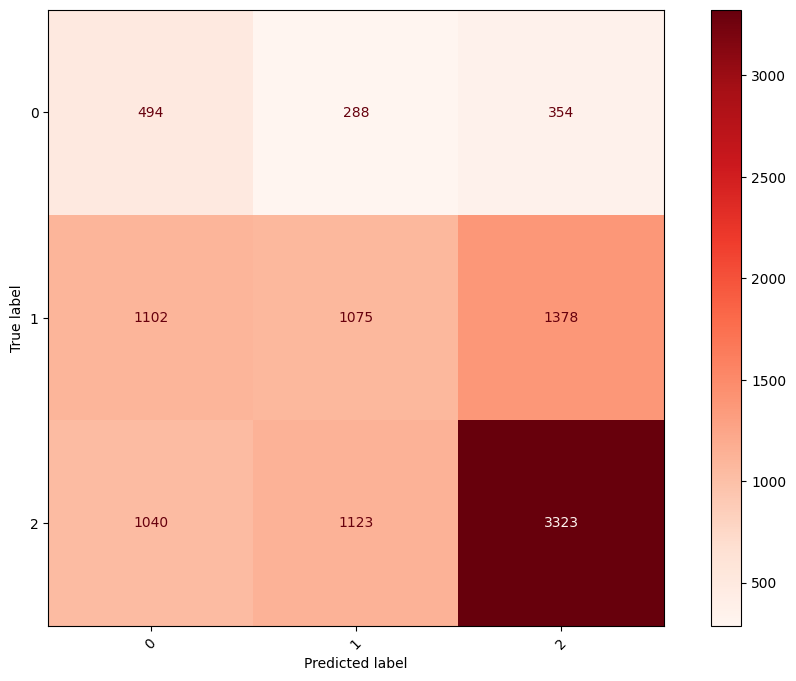

In [ ]:
def evaluate_model_new(model, X_test_tensor, y_test_tensor):
    model.eval()
    with torch.no_grad():
        output = model(X_test_tensor)
        _, preds = torch.max(output, 1)
    y_true = y_test_tensor.cpu().numpy()
    y_pred = preds.cpu().numpy()

    print("Classification Report:\n", classification_report(y_true, preds))

    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    fig, ax = plt.subplots(figsize=(12, 8))
    disp.plot(ax=ax, cmap="Reds", xticks_rotation=45)
    plt.show()

evaluate_model_new(model_c, X_test_tensor, y_test_tensor)